In [46]:
import numpy as np
import pandas as pd

In [47]:
data = pd.read_csv("datasets/customers.csv")

data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


No null values

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Imbalanced label

In [49]:
data["y"].value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

In [50]:
from imblearn.over_sampling import RandomOverSampler

features = data.drop("y", axis = 1)
label = data["y"]

resampler = RandomOverSampler(random_state = 0)

resampled_features, resampled_label = resampler.fit_resample(features, label)

data = pd.concat([resampled_features, resampled_label], axis=1)

data["y"].value_counts()

y
no     39922
yes    39922
Name: count, dtype: int64

In [51]:
data.drop("y", axis = 1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79839,63,blue-collar,married,secondary,no,180,no,no,cellular,15,jul,390,2,182,5,success
79840,27,management,single,tertiary,no,20585,no,no,cellular,23,sep,299,1,100,1,success
79841,36,technician,married,tertiary,no,202,no,no,cellular,29,jan,313,1,120,3,failure
79842,36,management,married,tertiary,no,4069,no,no,cellular,21,nov,517,1,-1,0,unknown


In [52]:
x = data.iloc[:, :16].values
y = data["y"]

Encode label's values "yes" and "no"

In [53]:
from sklearn.preprocessing import LabelEncoder

yEncoder = LabelEncoder()

y = yEncoder.fit_transform(y)

Encode categorical features' values

In [54]:
data["job"].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [55]:
categorical_features = x[:, [1, 2, 3, 4, 6, 7, 8, 10, 15]]
numeric_features = x[:, [0, 5, 9, 11, 12, 13, 14]]

In [56]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features_count = categorical_features.shape[1]

for i in range(categorical_features_count):
  # one hot encode will remove feature's column and replace it with n columns inserted at index 0
  categorical_encoded_features_count = categorical_features.shape[1]
  featureIndexToEncode = categorical_encoded_features_count - categorical_features_count + i

  OHEncoder = OneHotEncoder()
  column_transformer = ColumnTransformer(
    transformers = [("encoder", OHEncoder, [featureIndexToEncode])],
    remainder = "passthrough",
    sparse_threshold = 0
  )

  categorical_features = column_transformer.fit_transform(categorical_features)

categorical_features.shape

(79844, 44)

In [57]:
x = np.concatenate((numeric_features, categorical_features), axis = 1)

x.shape

(79844, 51)

In [58]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)

##### Standardization scales data into values have mean equals to 0 and standard deviation equals to 1

(Current Value - Mean Value) / STD Value

In [59]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(units = 128, activation = "relu"))
model.add(Dense(units = 64, activation = "relu"))
model.add(Dense(units = 32, activation = "relu"))
model.add(Dense(units = 1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [62]:
model.fit(x_train, y_train, epochs = 100, validation_data = (x_test, y_test))

Epoch 1/100
1872/1872 [==============================] - 6s 3ms/step - loss: 0.3396 - accuracy: 0.8574 - val_loss: 0.3237 - val_accuracy: 0.8665
Epoch 2/100
1872/1872 [==============================] - 6s 3ms/step - loss: 0.2885 - accuracy: 0.8832 - val_loss: 0.2885 - val_accuracy: 0.8834
Epoch 3/100
1872/1872 [==============================] - 5s 3ms/step - loss: 0.2667 - accuracy: 0.8943 - val_loss: 0.2713 - val_accuracy: 0.8920
Epoch 4/100
1872/1872 [==============================] - 5s 3ms/step - loss: 0.2485 - accuracy: 0.9020 - val_loss: 0.2690 - val_accuracy: 0.8934
Epoch 5/100
1872/1872 [==============================] - 6s 3ms/step - loss: 0.2316 - accuracy: 0.9095 - val_loss: 0.2533 - val_accuracy: 0.9012
Epoch 6/100
1872/1872 [==============================] - 6s 3ms/step - loss: 0.2173 - accuracy: 0.9174 - val_loss: 0.2484 - val_accuracy: 0.9048
Epoch 7/100
1872/1872 [==============================] - 5s 3ms/step - loss: 0.2042 - accuracy: 0.9223 - val_loss: 0.2395 - val_ac

Implement Dropout layer to make train accuracy close to validation accuracy, useful for overfitting cases

In [63]:
from keras.layers import Dropout

model = Sequential()

model.add(Dense(units = 128, activation = "relu"))
model.add(Dense(units = 64, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(units = 32, activation = "relu"))
model.add(Dense(units = 1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [64]:
history = model.fit(x_train, y_train, epochs = 100, validation_data = (x_test, y_test))

Epoch 1/100
1872/1872 [==============================] - 8s 4ms/step - loss: 0.3734 - accuracy: 0.8408 - val_loss: 0.3241 - val_accuracy: 0.8646
Epoch 2/100
1872/1872 [==============================] - 5s 3ms/step - loss: 0.3141 - accuracy: 0.8719 - val_loss: 0.3060 - val_accuracy: 0.8758
Epoch 3/100
1872/1872 [==============================] - 5s 3ms/step - loss: 0.2967 - accuracy: 0.8804 - val_loss: 0.2995 - val_accuracy: 0.8761
Epoch 4/100
1872/1872 [==============================] - 6s 3ms/step - loss: 0.2845 - accuracy: 0.8846 - val_loss: 0.2855 - val_accuracy: 0.8857
Epoch 5/100
1872/1872 [==============================] - 6s 3ms/step - loss: 0.2748 - accuracy: 0.8898 - val_loss: 0.2773 - val_accuracy: 0.8894
Epoch 6/100
1872/1872 [==============================] - 6s 3ms/step - loss: 0.2667 - accuracy: 0.8934 - val_loss: 0.2782 - val_accuracy: 0.8878
Epoch 7/100
1872/1872 [==============================] - 6s 3ms/step - loss: 0.2607 - accuracy: 0.8963 - val_loss: 0.2754 - val_ac

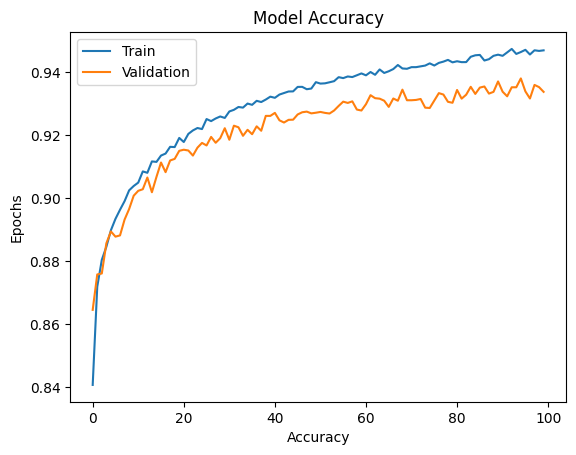

In [65]:
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

plt.title("Model Accuracy")
plt.xlabel("Accuracy")
plt.ylabel("Epochs")
plt.legend(["Train", "Validation"], loc = "upper left")
plt.show()

In [66]:
loss, accuracy = model.evaluate(x_test, y_test)

loss, accuracy

624/624 [==============================] - 2s 2ms/step - loss: 0.2049 - accuracy: 0.9337


(0.20490677654743195, 0.9336706399917603)

In [67]:
y_predict = model.predict(x_test)

y_predict = (y_predict > 0.5)

y_predict

624/624 [==============================] - 1s 2ms/step


array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [68]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_predict)
print(f"Accuracy: {accuracy}")

accuracy = precision_score(y_test, y_predict)
print(f"Precision: {accuracy}")

accuracy = recall_score(y_test, y_predict)
print(f"Recall: {accuracy}")

accuracy = f1_score(y_test, y_predict)
print(f"F1: {accuracy}")

Accuracy: 0.9336706577826762
Precision: 0.8987699316628701
Recall: 0.9788627567728491
F1: 0.9371081132433973
